<a href="https://colab.research.google.com/github/NownS/2020_AI/blob/master/3%EC%A3%BC%EC%B0%A8_%EA%B3%BC%EC%A0%9C_cnn_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import keras

In [2]:
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, MaxPooling2D, AveragePooling2D
from keras.optimizers import Adam
from keras.losses import sparse_categorical_crossentropy as scc

from keras.datasets import cifar10

import numpy as np
import matplotlib.pyplot as plt

In [3]:
def build_model(width, height, channel):
    model = Sequential()

    model.add(Conv2D(filters=16, kernel_size=(3,3), padding='same', activation='relu', input_shape=(width, height, channel)))
    model.add(Conv2D(filters=16, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
    
    model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
    
    model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(AveragePooling2D(pool_size=(8,8), padding='same'))
    
    model.add(Flatten())
    model.add(Dense(units=640, activation='relu'))
    model.add(Dense(units=10, activation='softmax'))

    opt = Adam(learning_rate=0.001)
    model.compile(optimizer=opt, loss=scc, metrics=['accuracy'])

    return model

In [4]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print(x_train.shape)

model = build_model(x_train.shape[1], x_train.shape[2], x_train.shape[3])

(50000, 32, 32, 3)


In [5]:
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1)

hist = model.fit(x_train, y_train, batch_size=32, epochs=100, verbose=1, shuffle=True, validation_split=0.1, callbacks=[early_stop])

Epoch 1/100
1407/1407 [==============================] - 5s 3ms/step - loss: 1.6070 - accuracy: 0.4061 - val_loss: 1.3029 - val_accuracy: 0.5164
Epoch 2/100
1407/1407 [==============================] - 5s 3ms/step - loss: 1.2046 - accuracy: 0.5660 - val_loss: 1.2496 - val_accuracy: 0.5552
Epoch 3/100
1407/1407 [==============================] - 5s 3ms/step - loss: 1.0326 - accuracy: 0.6352 - val_loss: 0.9659 - val_accuracy: 0.6624
Epoch 4/100
1407/1407 [==============================] - 5s 3ms/step - loss: 0.9246 - accuracy: 0.6730 - val_loss: 0.9327 - val_accuracy: 0.6726
Epoch 5/100
1407/1407 [==============================] - 5s 3ms/step - loss: 0.8443 - accuracy: 0.7049 - val_loss: 0.8338 - val_accuracy: 0.7068
Epoch 6/100
1407/1407 [==============================] - 5s 3ms/step - loss: 0.7890 - accuracy: 0.7212 - val_loss: 0.8478 - val_accuracy: 0.7078
Epoch 7/100
1407/1407 [==============================] - 5s 3ms/step - loss: 0.7444 - accuracy: 0.7370 - val_loss: 0.8166 - val_ac

In [6]:
model.evaluate(x_test, y_test, verbose=1)

313/313 [==============================] - 1s 2ms/step - loss: 1.1989 - accuracy: 0.7169


[1.1989048719406128, 0.7168999910354614]

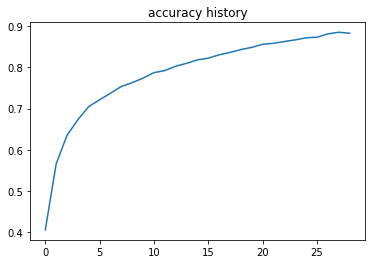

In [7]:
plt.plot(hist.history['accuracy'])
plt.title("accuracy history")
plt.show()

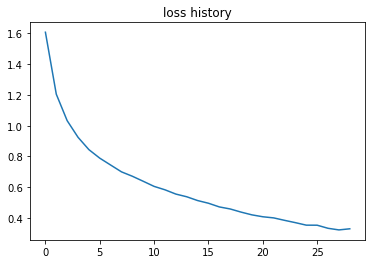

In [8]:
plt.plot(hist.history['loss'])
plt.title('loss history')
plt.show()